In [32]:
import os 
import warnings
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
plt.style.use("fivethirtyeight")
warnings.filterwarnings("ignore")

In [34]:
os.listdir("./data")

['submission.csv', 'FIFA_train.csv', 'FIFA_test.csv']

In [35]:
# dataset 경로
# 절대 경로로 설정하면 os마다 차이가 크게 날 수 있음
train_path = os.path.join("data", "FIFA_train.csv")
test_path = os.path.join("data", "FIFA_test.csv")

In [36]:
# dataset load
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [37]:
# info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3828 non-null   int64  
 1   name              3828 non-null   object 
 2   age               3828 non-null   int64  
 3   continent         3828 non-null   object 
 4   contract_until    3828 non-null   object 
 5   position          3828 non-null   object 
 6   prefer_foot       3828 non-null   object 
 7   reputation        3828 non-null   float64
 8   stat_overall      3828 non-null   int64  
 9   stat_potential    3828 non-null   int64  
 10  stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 329.1+ KB


In [39]:
# train부터 살펴보기
# shape
train.shape

(8932, 12)

In [40]:
# head 
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [41]:
# 기술통계량
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,8932.0,7.966776e+03,4.844429e+03,0.0,3751.75,7696.5,12082.25,16948.0
age,8932.0,2.520914e+01,4.635515e+00,16.0,21.00,25.0,28.00,40.0
reputation,8932.0,1.130878e+00,4.237919e-01,1.0,1.00,1.0,1.00,5.0
stat_overall,8932.0,6.709113e+01,6.854910e+00,47.0,63.00,67.0,72.00,94.0
stat_potential,8932.0,7.199720e+01,5.988147e+00,48.0,68.00,72.0,76.00,94.0
stat_skill_moves,8932.0,2.401702e+00,7.760476e-01,1.0,2.00,2.0,3.00,5.0
value,8932.0,2.778673e+06,5.840982e+06,10000.0,375000.00,825000.0,2600000.00,110500000.0


In [42]:
# NA value
train.isna().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [43]:
# train columns - test columns 
set(train.columns) - set(test.columns)

{'value'}

# 데이터 자세히 살펴보기

In [44]:
# 비싼 친구들을 좀 볼까
train.sort_values(by="value", ascending=False)[:30]

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
17,30,Isco,26,europe,2022,ST,right,3.0,88,91,4.0,73500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
14,26,M. Salah,26,africa,2023,MF,left,3.0,88,89,4.0,69500000.0
18,32,Coutinho,26,south america,2023,ST,right,3.0,88,89,5.0,69500000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
26,45,P. Pogba,25,europe,2021,MF,right,4.0,87,91,5.0,64000000.0
7,14,N. Kanté,27,europe,2023,MF,right,3.0,89,90,2.0,63000000.0
27,47,R. Lukaku,25,europe,2022,ST,left,3.0,87,89,3.0,62500000.0


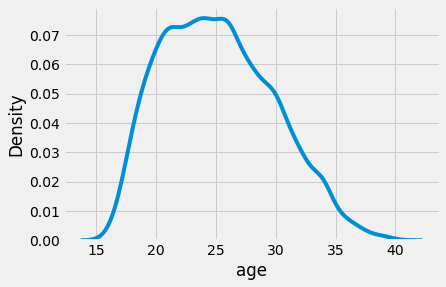

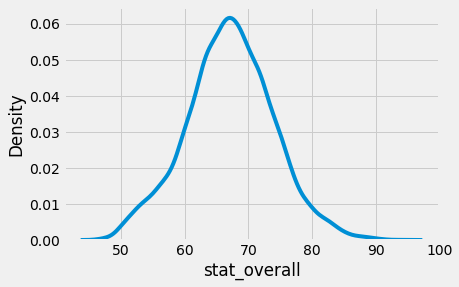

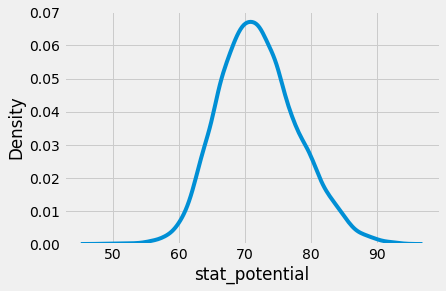

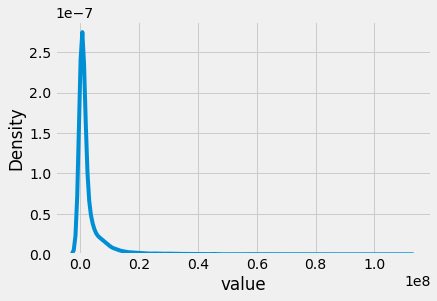

In [45]:
# distribution
cols = ["age","stat_overall","stat_potential","value"]
for col in cols:
    sns.kdeplot(data=train, x=col)
    plt.show()

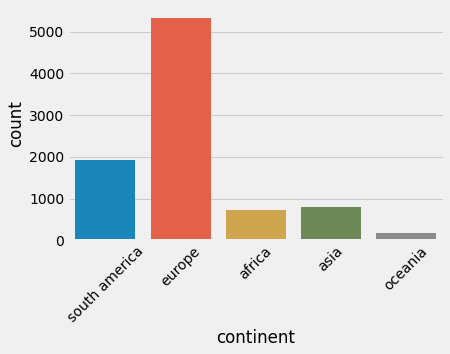

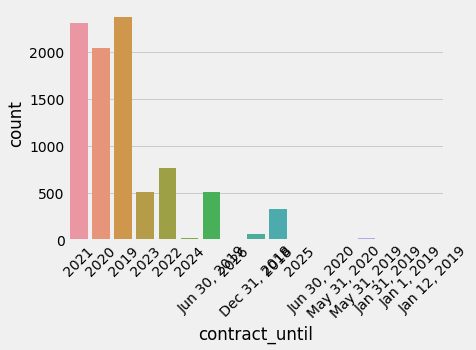

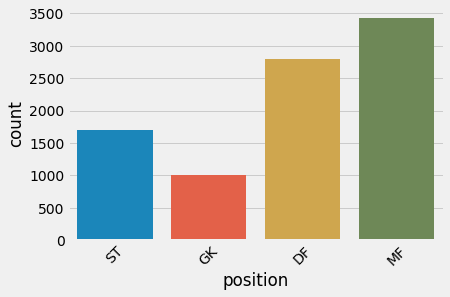

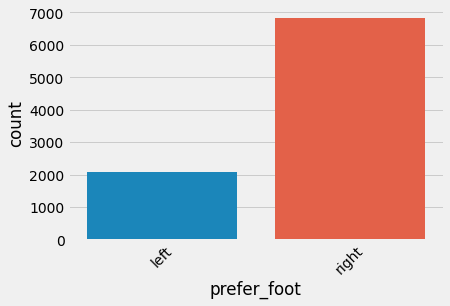

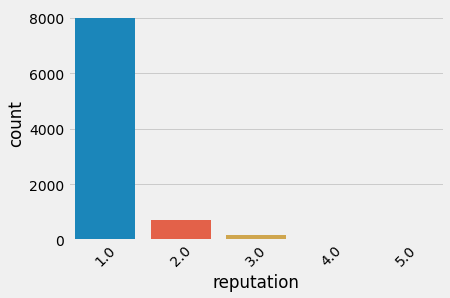

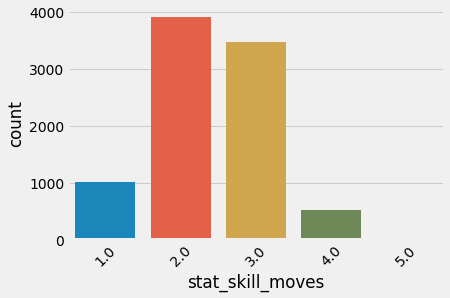

In [46]:
# countplot
cols = ["continent","contract_until","position","prefer_foot","reputation","stat_skill_moves"]
for col in cols:
    sns.countplot(train[col])
    plt.xticks(rotation=45)
    plt.show()

In [58]:
pd.set_option("precision", 100)
train.groupby("reputation")["value"].mean()

reputation
1.0     1690091.71449962561018764972686767578125
2.0     8639220.96317280456423759460449218750000
3.0    22014830.50847457721829414367675781250000
4.0    33429032.25806451588869094848632812500000
5.0    60625000.00000000000000000000000000000000
Name: value, dtype: float64

### Preprocessing and Feature Engineering

In [47]:
# contract_until의 날짜를 동일하게 만들어줌 
# 년도만 남겨두고 삭제
train['contract_until'] = train['contract_until'].map(lambda x : x[-4:])

In [48]:
train['contract_until'].unique()

array(['2021', '2020', '2019', '2023', '2022', '2024', '2026', '2018',
       '2025'], dtype=object)

In [49]:
# 계약기간을 얼마나 남았는지로 변경
train['contract_until'] = train['contract_until'].astype(np.int32)
train['contract_until'] = train['contract_until'] - 2018

<AxesSubplot:xlabel='contract_until', ylabel='count'>

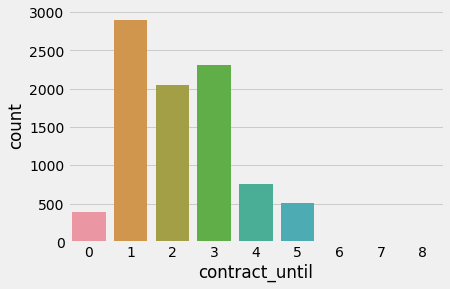

In [53]:
sns.countplot(train["contract_until"])

In [64]:
train2 = train.copy()

In [60]:
train2.head(1)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,3,ST,left,5.0,94,94,4.0,110500000.0


In [65]:
# one-hot encoding
train = pd.get_dummies(train, columns=["position", "prefer_foot","continent"])

In [69]:
# stat_overall - stat_potential => 성장 잠재력 수치
train['stat_potent'] = train["stat_potential"] - train['stat_overall'] 

In [77]:
# 축구선수 평균 은퇴나이 35세
train["retire_age_left"] = 35 - train['age']

In [79]:
train['retire_age_left'].min()

-5

In [67]:
# value log씌우기
train['value'] = np.log1p(train['value'])

In [81]:
# name은 필요없음
train.drop("name", axis=1, inplace=True)

In [ ]:
# 모델에 넣으려면 test도 train과 같아야죵

In [82]:
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


In [83]:
test['contract_until'] = test['contract_until'].map(lambda x : x[-4:])
test['contract_until'] = test['contract_until'].astype(np.int32)
test['contract_until'] = test['contract_until'] - 2018
test = pd.get_dummies(test, columns=["position", "prefer_foot","continent"])
test['stat_potent'] = test["stat_potential"] - test['stat_overall']
test["retire_age_left"] = 35 - test['age']
test.drop("name", axis=1, inplace=True)

In [94]:
train.drop("id", axis=1, inplace=True)
test.drop("id", axis=1, inplace=True)

In [95]:
set(train.columns) - set(test.columns)

{'value'}

In [96]:
X_train = train.drop("value", axis=1)
y_train = train.value

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
rf = RandomForestRegressor(n_estimators=300,random_state=130)

In [99]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=130)

In [100]:
pred = rf.predict(test)

In [102]:
prediction = np.expm1(pred)

In [104]:
submission = pd.read_csv("./data/submission.csv")

In [106]:
submission['value'] = prediction

In [137]:
submission.to_csv("submission_1.csv", index=False)

In [130]:
# train set 저장하는 방법
train.to_csv("./data/train_csv.csv", index=False)
train.to_pickle("./data/train_pickle.pkl")
train.to_feather("./data/train_feather.ftr")